# Simulating Poisson-Mixtures 

### Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

Here we simulate a simple mixture of Poissons (initially bivariate) from the distribution:

$$ X_i \sim \pi \text{Pois}(\lambda_1) + (1 - \pi)\text{Pois}(\lambda_2)$$

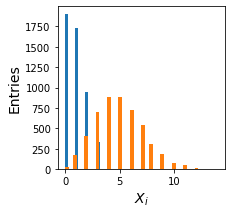

In [2]:
def sim_pois_mixture(rs, pis, size=1000):
    """Simulate an arbitrary Poisson mixture."""
    assert(np.sum(pis) == 1.0)
    assert(rs.size == pis.size)
    k = rs.size
    zs = np.random.multinomial(size, pvals=pis)
    xs = []
    for j in range(k):
        xs.append(np.random.poisson(lam=rs[j], size=zs[j]))
    xs = np.hstack(xs)
    return(xs,zs)
    
# Running the simulation 
xs, zs = sim_pois_mixture(rs=np.array([1., 5.]), pis=np.array([0.5,0.5]), size=10000);

# Generating the plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.hist(xs[:zs[0]], bins='auto');
ax.hist(xs[zs[0]:], bins='auto');
ax.set_xlabel(r'$X_i$', fontsize=14);
ax.set_ylabel(r'Entries', fontsize=14);